<a href="https://colab.research.google.com/github/lydiateinfalt/DATS6202-MachineLearningI-Fall2021/blob/main/LydiaTeinfalt_Group_Project_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
DATS 6202 Group 1 Project
</font>
</center>
</p>

<p>
<center>
<font size="4">
Convolutional Neural Networks
</font>
</center>
</p>
    

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
by Adel Hassen, Lydia Teinfalt, Pedro Vasquez-Perez
</font>
</center>
</p>
</b>

<p>
<center>
<font size="3">
Last Updated: 11/23/2021
</font>
</center>
</p>
</b>

# Overview

- This notebook DATS 6202 Group Project for Fall 2021 semester. 
- Group 1 members are: Adel Hassen, Lydia Teinfalt, Pedro Vasquez-Perez
- Here we will work on Kaggle Intel Image Classification Dataset [Natural Scenes Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train).
- The goal of this project is to classify approximately  25,000 images of size 150x150 distributed under 6 categories: 
  - {'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/DATS 6202/Project'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning


## Loading the data

In this case study, we will work on Intel Image Classification Dataset [Natural Scenes Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train) from Kaggle.

### Creating the directory for the data

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/data/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Getting the name of the target

In [ ]:
target = 'label'

## Getting the training, validation and test data

### Training Data

In [ ]:
#Keeping 80% of original training data
data_dir = directory + '//seg_train//seg_train//'
data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset="training",
    seed = random_seed,
    image_size = (150,150))

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


### Validation Data

In [ ]:
#Splitting 20% of the training data to be used for validation
data_valid = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset="validation",
    seed = random_seed,
    image_size = (150,150))

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


### Test Data

In [ ]:
data_test_dir = directory + '//seg_test//seg_test//'
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_dir, 
    seed = random_seed,
    image_size = (150,150))

Found 3000 files belonging to 6 classes.


In [ ]:
#Size of training data
print(data_train.__len__())

tf.Tensor(351, shape=(), dtype=int64)


In [ ]:
#Get training data class names
class_names_train = data_train.class_names
print(class_names_train)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


As part of data preprocessing, ensuring that the class names match between training and test data. They are the same.

In [ ]:
#Get test data class names
class_names_test = data_test.class_names
print(class_names_test)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
# Get the number of classes
n_classes = 6

# Print the number of classes
print(n_classes)

6


Reference: https://tensorflow.google.cn/tutorials/load_data/images?hl=en

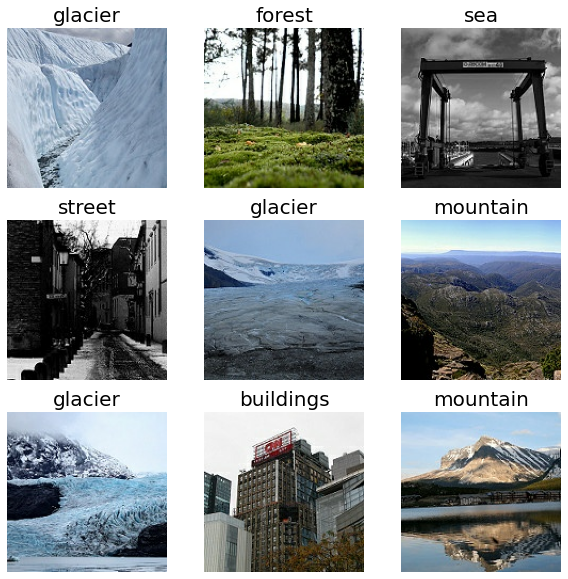

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_train[labels[i]])
    plt.axis("off")

## Resizing the data for pretrained model

In [ ]:
#Commented out code because it caused input shape error
# Set the default input size for the pretrained model
#global input_size
#input_size = [224, 224]

In [ ]:
#Commented out code because it caused input shape error
# Resize the training data
#data_train = data_train.map(resize)

# Resize the validation data
#data_valid = data_valid.map(resize)

# Resize the test data
#data_test = data_test.map(resize)

## Preprocessing the data using pretrained model

In [ ]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [ ]:
# Preprocess the training data using pretrained model
data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
data_test = data_test.map(preprocess_pretrain)

## Shuffling, batching and prefetching the data

In [ ]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 32

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model = keras.applications.ResNet50(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

## Freezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the model
Here we use the default learning rate of Adam optimizer.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',    
              metrics=['accuracy'])

## Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])


Epoch 1/5
351/351 [==============================] - 2227s 6s/step - loss: 0.8465 - accuracy: 0.8764 - val_loss: 0.7098 - val_accuracy: 0.9127 - lr: 0.0100
Epoch 2/5
351/351 [==============================] - 18s 51ms/step - loss: 0.6170 - accuracy: 0.9133 - val_loss: 1.2937 - val_accuracy: 0.8774 - lr: 0.0100
Epoch 3/5
351/351 [==============================] - 19s 55ms/step - loss: 0.2847 - accuracy: 0.9491 - val_loss: 0.5485 - val_accuracy: 0.9280 - lr: 1.0000e-03
Epoch 4/5
351/351 [==============================] - 19s 54ms/step - loss: 0.1747 - accuracy: 0.9571 - val_loss: 0.5180 - val_accuracy: 0.9241 - lr: 1.0000e-03
Epoch 5/5
351/351 [==============================] - 19s 54ms/step - loss: 0.1361 - accuracy: 0.9634 - val_loss: 0.5114 - val_accuracy: 0.9209 - lr: 1.0000e-03


## Plotting the learning curve

### Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

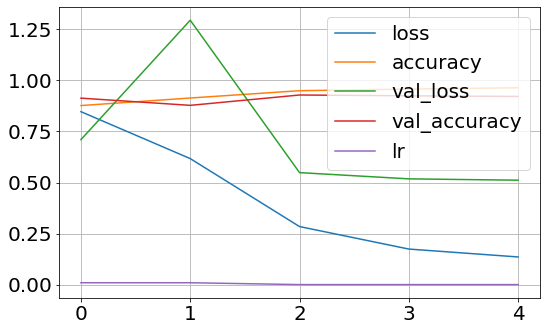

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
351/351 [==============================] - 47s 116ms/step - loss: 1.2028 - accuracy: 0.7695 - val_loss: 0.8108 - val_accuracy: 0.7940 - lr: 0.0010
Epoch 2/5
351/351 [==============================] - 40s 113ms/step - loss: 1.0144 - accuracy: 0.7961 - val_loss: 1.5278 - val_accuracy: 0.7669 - lr: 0.0010
Epoch 3/5
351/351 [==============================] - 41s 117ms/step - loss: 0.4243 - accuracy: 0.8688 - val_loss: 0.3899 - val_accuracy: 0.8888 - lr: 1.0000e-04
Epoch 4/5
351/351 [==============================] - 41s 117ms/step - loss: 0.3252 - accuracy: 0.8915 - val_loss: 0.2967 - val_accuracy: 0.9027 - lr: 1.0000e-04
Epoch 5/5
351/351 [==============================] - 40s 113ms/step - loss: 0.2876 - accuracy: 0.9048 - val_loss: 0.3191 - val_accuracy: 0.9027 - lr: 1.0000e-04


## Plotting the learning curve

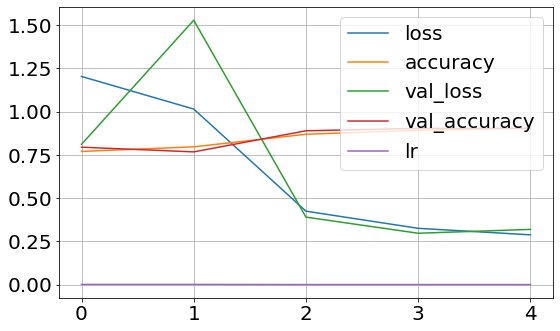

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing

## Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(data_test)

94/94 [==============================] - 483s 5s/step - loss: 0.3414 - accuracy: 0.8887


# Reference
- The code for building, compiling and training CNNs were largely inspired by the following work:
    - Géron, A., 2019. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.

- The deep utitilities and pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb)
    - Huang, Yuxiao, 2021. "Machine Learning I". Fall 2021.